<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Introduction:</font></h2>

Data Analysis and Ratings Prediction for Apps on Google Play Store

<img src="https://www.androidheadlines.com/wp-content/uploads/2012/11/Google-Play-02.webp" width="2400">

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>About data:</font></h2>


**App :** The name of the app

**Category :** The category of the app

**Rating :** The rating of the app in the Play Store

**Reviews :** The number of reviews of the app

**Size :** The size of the app

**Install :** The number of installs of the app

**Type :** The type of the app (Free/Paid)

**Price :** The price of the app (0 if it is Free)

**Content Rating :** The appropiate target audience of the app

**Genres:** The genre of the app

**Last Updated :** The date when the app was last updated

**Current Ver :** The current version of the app

**Android Ver :** The minimum Android version required to run the app

<h2 align="left"><font color=#ff6200>Let's get started:</font></h2>

<a id="setup"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 1 | Setup and Initialization</p>

<a id="libraries"></a>
# <b><span style='color:#fcc36d'>Step 1.1 |</span><span style='color:#ff6200'> Importing Necessary Libraries</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
First of all, I will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project:

In [1]:
# Data
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from wordcloud import WordCloud

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Hide warnings
import warnings
warnings.filterwarnings('ignore')


C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<a id="load_dataset"></a>
# <b><span style='color:#fcc36d'>Step 1.2 |</span><span style='color:#ff6200'> Loading the Dataset</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Next, I will load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis:

In [2]:
df = pd.read_excel("app_details.xlsx")


<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 2 | Initial Data Analysis</p>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Afterward, I am going to gain a thorough understanding of the dataset before proceeding to the data cleaning and transformation stages.

<a id="overview"></a>
# <b><span style='color:#fcc36d'>Step 2.1 |</span><span style='color:#ff6200'> Dataset Overview</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

First I will perform a preliminary analysis to understand the structure and types of data columns:

In [3]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Install,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13
3868,SkySafari 7 Pro,Education,4.455446,276,Unknown,"10,000+",Paid,19.99,Everyone,Education,"January 06, 2025",7.5.3.0,Unknown,NaN
10375,2Chargers - Ð—Ð°Ñ€ÑÐ´ÐºÐ¸ Ð½Ð° ÐºÐ°Ñ€Ñ‚Ðµ,Auto & Vehicles,3.666667,3,Unknown,"50,000+",Free,0,Everyone,Auto & Vehicles,"December 16, 2024",1.2.239,Unknown,NaN
5941,AI App Maker Builder Appy Pie,Tools,4.049672,13326,Unknown,"5,000,000+",Free,0,Everyone,Tools,"December 09, 2024",3.4.31,Unknown,NaN
4430,WealthPosition: Budget,Track,Finance,3.4,4,Unknown,"1,000+",Free,0,Everyone,Finance,"June 07, 2024",3.0.0.0,NaN
11356,Revealed Travel Guides,Travel & Local,3.547945,47,Unknown,"10,000+",Free,0,Everyone,Travel & Local,"March 05, 2025",6.25.4,Unknown,NaN


In [4]:
df.drop(columns=['Unnamed: 13'], inplace=True)

In [5]:
df.shape

(11635, 13)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
**As we can see we have data of 10841 applications consisting of 13 attributes.**

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Install', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.describe()

,App,Category,Rating,Reviews,Size,Install,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,11635,11635,9993,9981,11623,11635,11635,11635,11635,11635,11635,11635,11635
unique,11625,329,5068,3499,253,95,19,59,10,55,999,5012,250
top,Linguistics,Education,0,0,Unknown,"10,000+",Free,0,Everyone,Education,"April 01, 2025",Varies with device,Unknown
freq,2,1581,1218,1277,11327,1859,11099,11099,9640,1581,391,515,11327


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
**Here we can see that only Rating column is only in float, so we need to convert numerical columns into int and float.**  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11635 entries, 0 to 11634
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             11635 non-null  object
 1   Category        11635 non-null  object
 2   Rating          9993 non-null   object
 3   Reviews         9981 non-null   object
 4   Size            11623 non-null  object
 5   Install         11635 non-null  object
 6   Type            11635 non-null  object
 7   Price           11635 non-null  object
 8   Content Rating  11635 non-null  object
 9   Genres          11635 non-null  object
 10  Last Updated    11635 non-null  object
 11  Current Ver     11635 non-null  object
 12  Android Ver     11635 non-null  object
dtypes: object(13)
memory usage: 1.2+ MB


<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 3 | Preprocessing</p>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
**As most of the features are set to data type object and have suffixes, each feature's data type must be converted into a suitable format for analysis.**

# Impute Missing Value

In [9]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Pastikan tipe data numerik, jika error ubah jadi NaN
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Inisialisasi imputer dengan strategi mean
imputer = SimpleImputer(strategy='mean')

# Terapkan imputer ke kolom 'Rating' dan 'Reviews'
df[['Rating', 'Reviews']] = imputer.fit_transform(df[['Rating', 'Reviews']])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11635 entries, 0 to 11634
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             11635 non-null  object 
 1   Category        11635 non-null  object 
 2   Rating          11635 non-null  float64
 3   Reviews         11635 non-null  float64
 4   Size            11623 non-null  object 
 5   Install         11635 non-null  object 
 6   Type            11635 non-null  object 
 7   Price           11635 non-null  object 
 8   Content Rating  11635 non-null  object 
 9   Genres          11635 non-null  object 
 10  Last Updated    11635 non-null  object 
 11  Current Ver     11635 non-null  object 
 12  Android Ver     11635 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 3.3 |</span><span style='color:#ff6200'> Installs and Price</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
* The feature Installs must be of integer type.

* The characters ',' and '+' must be removed. \ Example: '10,000+' to 10000

* The feature Price must be of floating type.

* The suffix '\$' must be removed if Price is non-zero. \ Example: '$4.99' to 4.99

In [19]:
df['Install'].unique()

array(['10,000,000+', '1,000,000+', '100,000+', '500,000+', 50, '50,000+',
       53713, '50,000,000+', 'Unknown', '1,000+', '5,000,000+', '5,000+',
       '10,000+', '100,000,000+', '1,000,000,000+', 415060,
       '500,000,000+', 4507, 270, '5,000,000,000+', '10,000,000,000+',
       10262, 303945, 10802, 330029, 11449, '1+', 0, 62250, 55636, 46968,
       97402, 2315, 4554, 689535, 366, 4.34, 5516, 54, 21, 2, '10+',
       '100+', 10097, 3880, 2222, 244, 616, 5000, 359, 24429, 4.632127,
       239, 3427, 4843, 74, '500+', 80677, 1214, 10, 1419, 454, 1442,
       '50+', 1334, '5+', 4733, 73, 5385, 8, 492, 158, 5, 83, 814, 609, 6,
       335, 92, 3830, 119, 1, 860, 4, 6664, 41, 1280, '0+', 28, 68, 3080,
       478, 203, 1007, 1997], dtype=object)

In [20]:
df['Price'].unique()

array([0, '1,000,000+', '10,000,000+', 'Free', 1.99, 14.99,
       '100,000,000+', '500,000,000+', '5,000,000+', '50,000,000+', 6.99,
       '1,000+', 29.99, 54.99, 5.99, '500,000+', 'Unknown', 9.99, 32.99,
       '100,000+', 'Paid', 2.99, 3.99, 4.99, 4.49, 12.99, 3.49, 7.99,
       3.22, 19.99, 7.49, '50,000+', 8.49, 5.49, 15.99, 45.99, 0.99, 2.49,
       0.49, 1.49, 10.99, '10,000+', 16.49, 8.99, 18.99, 24.99, 13.99,
       9.95, 6.49, '5,000+', 26.99, 2, 75, 9.49, 11.99, 33.99, 39.99,
       49.99, 23.99], dtype=object)

In [21]:
# Bersihkan karakter yang tidak diinginkan
df['Install'] = df['Install'].astype(str).str.replace(r'[+, $]', '', regex=True)
df['Install'] = pd.to_numeric(df['Install'], errors='coerce')

# Tangani NaN sebelum ubah ke int
df['Install'] = df['Install'].fillna(df['Install'].median()).astype(int)

# Lakukan hal serupa untuk kolom Price
df['Price'] = df['Price'].astype(str).str.replace(r'[+, $]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'] = df['Price'].fillna(df['Price'].median()).astype(float)


In [22]:
df.Install.unique()

array([   10000000,     1000000,      100000,      500000,          50,
             50000,       53713,    50000000,        1000,     5000000,
              5000,       10000,   100000000,  1000000000,      415060,
         500000000,        4507,         270, -2147483648,       10262,
            303945,       10802,      330029,       11449,           1,
                 0,       62250,       55636,       46968,       97402,
              2315,        4554,      689535,         366,           4,
              5516,          54,          21,           2,          10,
               100,       10097,        3880,        2222,         244,
               616,         359,       24429,         239,        3427,
              4843,          74,         500,       80677,        1214,
              1419,         454,        1442,        1334,           5,
              4733,          73,        5385,           8,         492,
               158,          83,         814,         609,      

In [23]:
df['Price'].unique()

array([0.000e+00, 1.000e+06, 1.000e+07, 1.990e+00, 1.499e+01, 1.000e+08,
       5.000e+08, 5.000e+06, 5.000e+07, 6.990e+00, 1.000e+03, 2.999e+01,
       5.499e+01, 5.990e+00, 5.000e+05, 9.990e+00, 3.299e+01, 1.000e+05,
       2.990e+00, 3.990e+00, 4.990e+00, 4.490e+00, 1.299e+01, 3.490e+00,
       7.990e+00, 3.220e+00, 1.999e+01, 7.490e+00, 5.000e+04, 8.490e+00,
       5.490e+00, 1.599e+01, 4.599e+01, 9.900e-01, 2.490e+00, 4.900e-01,
       1.490e+00, 1.099e+01, 1.000e+04, 1.649e+01, 8.990e+00, 1.899e+01,
       2.499e+01, 1.399e+01, 9.950e+00, 6.490e+00, 5.000e+03, 2.699e+01,
       2.000e+00, 7.500e+01, 9.490e+00, 1.199e+01, 3.399e+01, 3.999e+01,
       4.999e+01, 2.399e+01])

In [25]:
df['Install'] = df['Install'].fillna(df['Install'].median())
df['Install'] = df['Install'].astype('int')

df['Price'] = df['Price'].fillna(df['Price'].median())
df['Price'] = df['Price'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11635 entries, 0 to 11634
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             11635 non-null  object 
 1   Category        11635 non-null  object 
 2   Rating          11635 non-null  float64
 3   Reviews         11635 non-null  float64
 4   Size            11623 non-null  object 
 5   Install         11635 non-null  int32  
 6   Type            11635 non-null  object 
 7   Price           11635 non-null  float64
 8   Content Rating  11635 non-null  object 
 9   Genres          11635 non-null  object 
 10  Last Updated    11635 non-null  object 
 11  Current Ver     11635 non-null  object 
 12  Android Ver     11635 non-null  object 
dtypes: float64(3), int32(1), object(9)
memory usage: 1.1+ MB


<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 3.3 |</span><span style='color:#ff6200'> last updated</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
* Updating the Last Updated column's datatype from string to pandas datetime.

* Extracting new columns Updated Year, Updated Month and updated day.

In [26]:
#### Change Last update into a datetime column
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df['Last Updated']

0       2025-04-03
1       2025-03-31
2       2024-09-24
3       2025-03-21
4       2024-09-23
           ...    
11630   2025-02-27
11631   2025-03-28
11632   2025-01-24
11633   2025-03-07
11634   2025-03-03
Name: Last Updated, Length: 11635, dtype: datetime64[ns]

In [27]:
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year

In [28]:
df.drop('Last Updated', axis=1, inplace=True)

In [29]:
df.head()

,App,Category,Rating,Reviews,Size,Install,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,Yahoo Finance: Stocks & News,Finance,4.538830,43910.0,Unknown,10000000,Free,0.0,Everyone 10+,Finance,13.23.0,Unknown,4.0,2025.0
1,Forex Trading School & Game,Finance,4.669643,278.0,Unknown,1000000,Free,0.0,Everyone,Finance,2.9.6,Unknown,3.0,2025.0
2,Forex Portal: all market data,Finance,4.480000,153.0,Unknown,1000000,Free,0.0,Mature 17+,Finance,3.3.2,Unknown,9.0,2024.0
3,Pocket Forex - Trade & Signals,Finance,4.161765,32.0,Unknown,100000,Free,0.0,Everyone,Finance,5.0.3,Unknown,3.0,2025.0
4,FXCM â€“ CFD & Forex Trading,Finance,4.159421,31.0,Unknown,500000,Free,0.0,Everyone,Finance,3.6.091824,Unknown,9.0,2024.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11635 entries, 0 to 11634
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             11635 non-null  object 
 1   Category        11635 non-null  object 
 2   Rating          11635 non-null  float64
 3   Reviews         11635 non-null  float64
 4   Size            11623 non-null  object 
 5   Install         11635 non-null  int32  
 6   Type            11635 non-null  object 
 7   Price           11635 non-null  float64
 8   Content Rating  11635 non-null  object 
 9   Genres          11635 non-null  object 
 10  Current Ver     11635 non-null  object 
 11  Android Ver     11635 non-null  object 
 12  Updated_Month   11327 non-null  float64
 13  Updated_Year    11327 non-null  float64
dtypes: float64(5), int32(1), object(8)
memory usage: 1.2+ MB


<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 4 | Data cleaning</p>

In [31]:
null = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Updated_Month,308,2.647185
Updated_Year,308,2.647185
Size,12,0.103137
App,0,0.000000
Category,0,0.000000
Rating,0,0.000000
Reviews,0,0.000000
Install,0,0.000000
Type,0,0.000000
Price,0,0.000000


<BarContainer object of 14 artists>

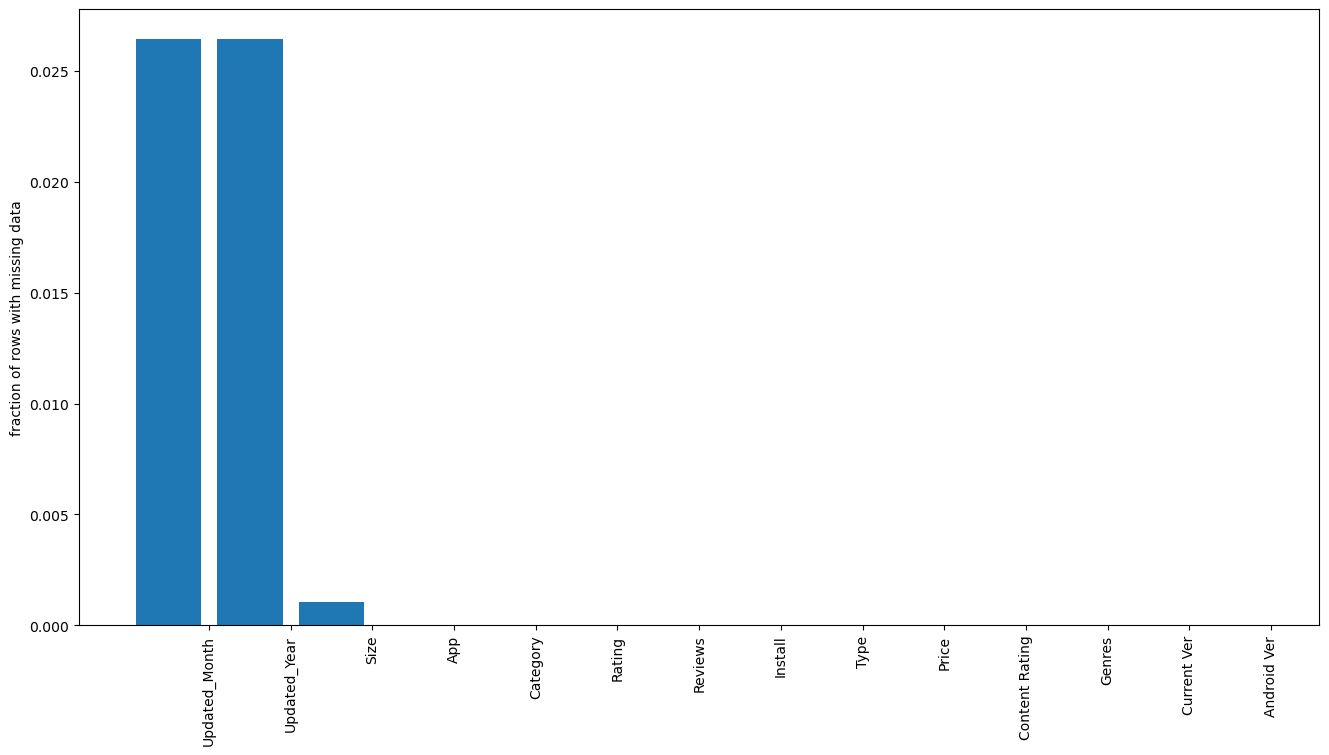

In [32]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

**Its clear that we have missing values in Rating, Type, Content Rating, Current Ver and Android Ver.**

<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 4.1 |</span><span style='color:#ff6200'> Handling missing values</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

**I Clean missing values using Random Value Imputation Because This the best way to To maintain distrbuation For each feature.**

In [33]:
most_common_month = df['Updated_Month'].mode()[0]
median_year = int(df['Updated_Year'].median())

df['Updated_Month'].fillna(most_common_month, inplace=True)
df['Updated_Year'].fillna(median_year, inplace=True)


In [34]:
df['Size'].fillna(str(df['Size'].mode().values[0]),inplace=True)

In [39]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Install           0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       0
Updated_Month     0
Updated_Year      0
dtype: int64

<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 4.2 |</span><span style='color:#ff6200'> Delete duplicated data</span></b>

In [42]:
duplicate = df.duplicated()
print(duplicate.sum())

0


In [43]:
df.drop_duplicates(inplace=True)

In [44]:
duplicate = df.duplicated()
print(duplicate.sum())

0


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
Extract Numerical and categorical features

In [45]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Rating', 'Reviews', 'Install', 'Price', 'Updated_Month', 'Updated_Year']

In [46]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['App',
 'Category',
 'Size',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 4.3 |</span><span style='color:#ff6200'> Check outliers</span></b>

<Axes: >

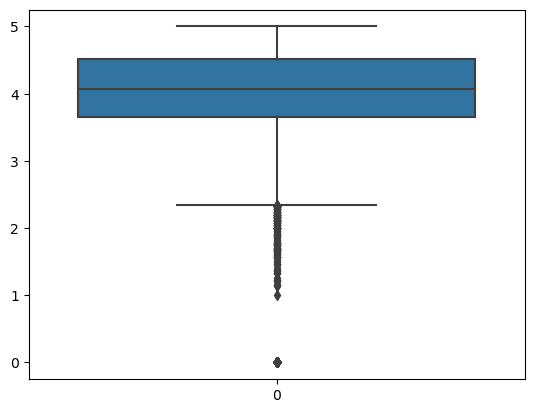

In [47]:
sns.boxplot(df["Rating"])

<Axes: >

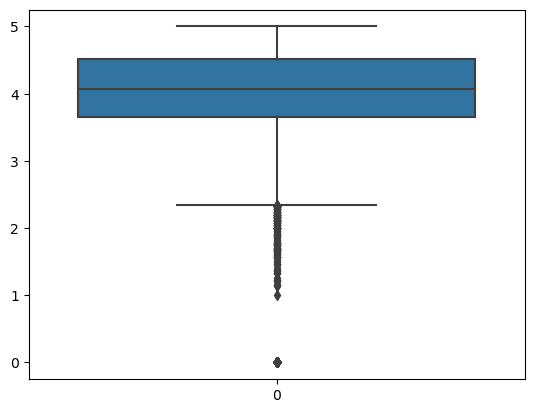

In [48]:
sns.boxplot(df["Rating"])

In [49]:
# sns.boxplot(df["Size"])

<Axes: >

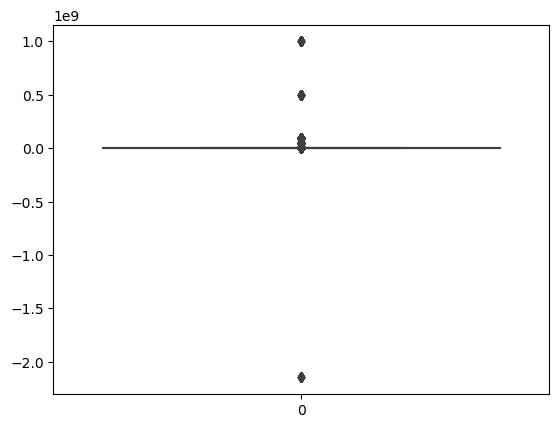

In [50]:
sns.boxplot(df["Install"])

<Axes: >

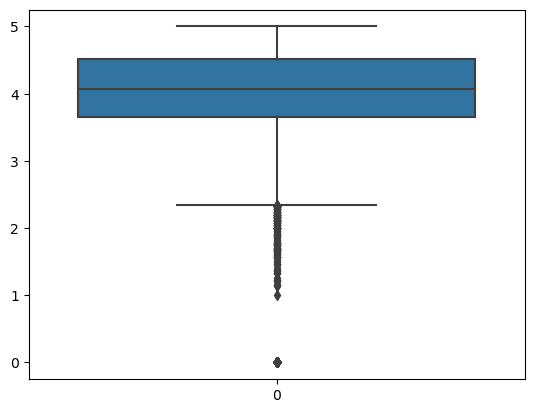

In [51]:
sns.boxplot(df["Rating"])

<Axes: >

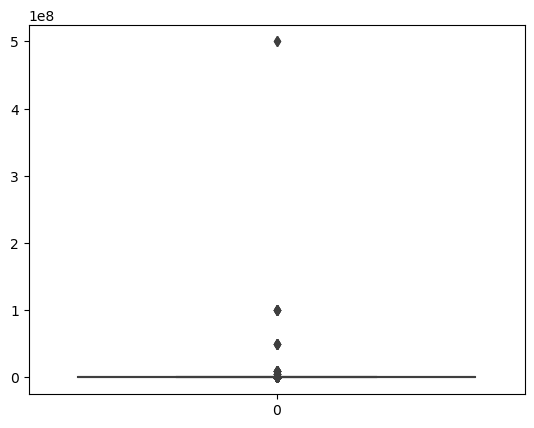

In [52]:
sns.boxplot(df["Price"])

<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 5 | Exploratory Data Analysis (EDA)</p>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

## Category Column

In [53]:
df['Category'].value_counts()

Category
Education             1581
Health & Fitness       905
Business               787
Tools                  677
Productivity           657
                      ... 
 Great Coffee            1
 Wind                    1
 Buy                     1
 Rent Property           1
 D.C. Travel Guide       1
Name: count, Length: 329, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

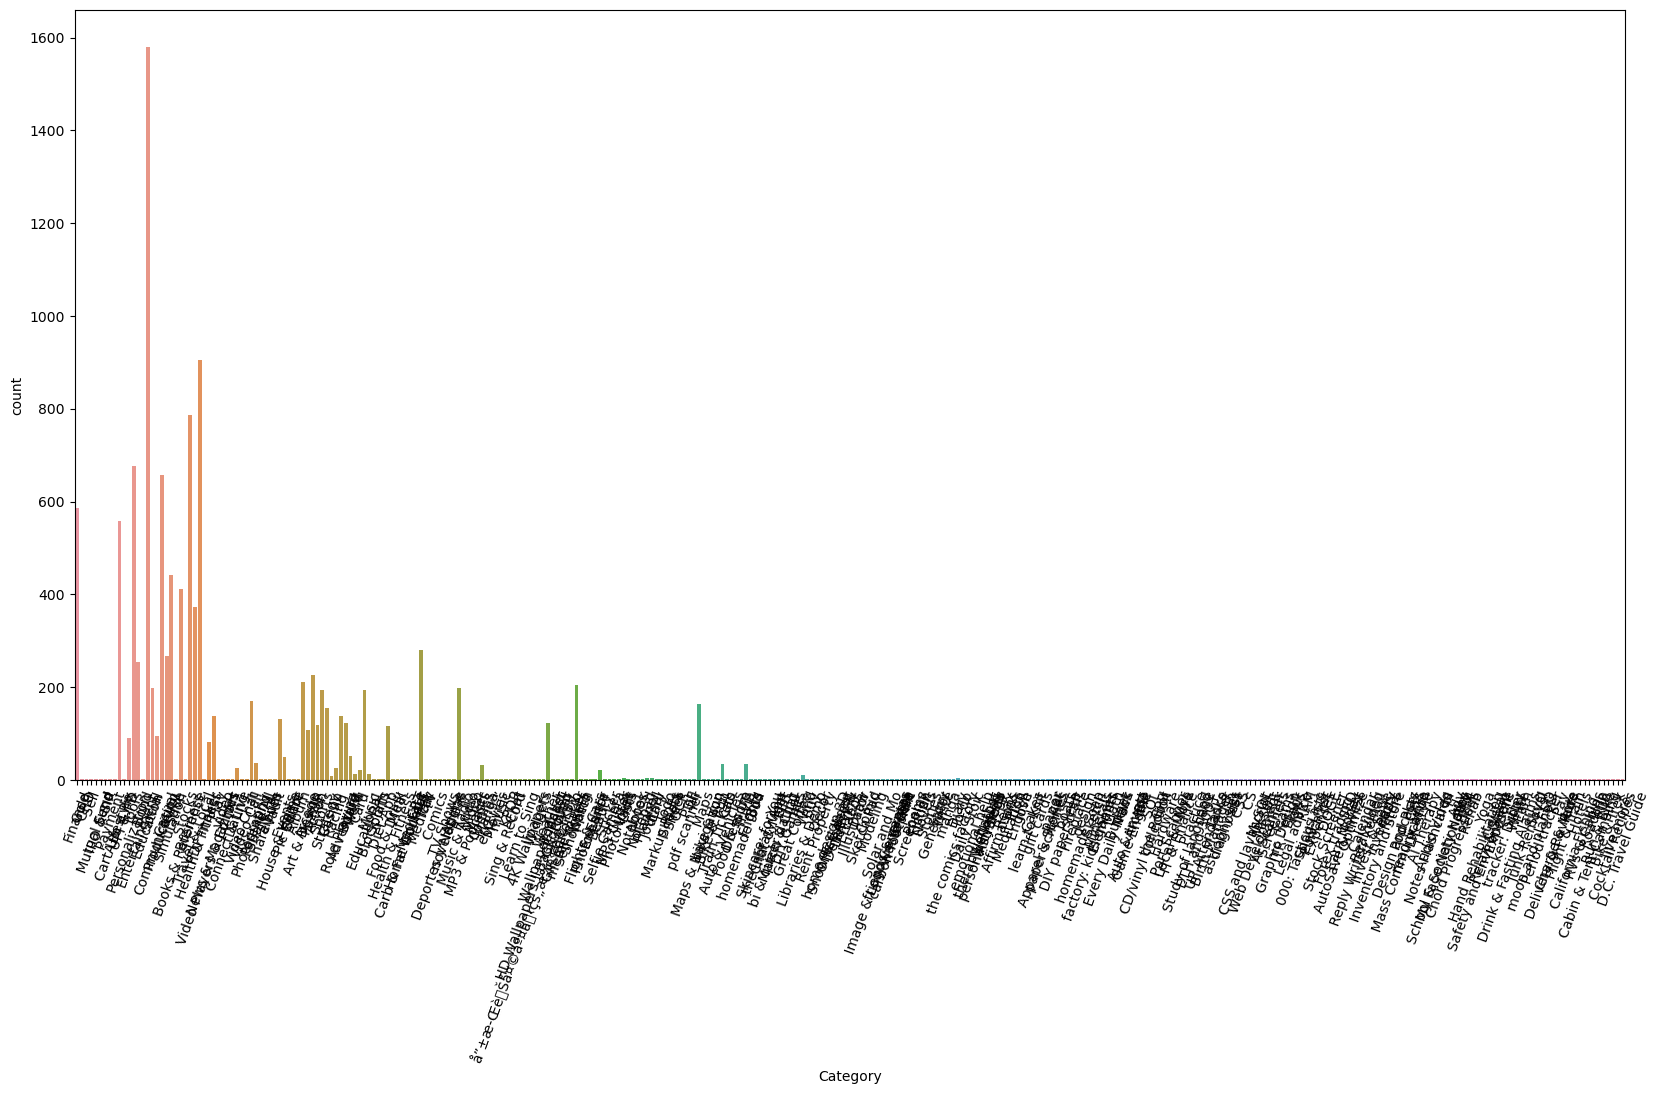

In [54]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=df)
plt.xticks(rotation=70)

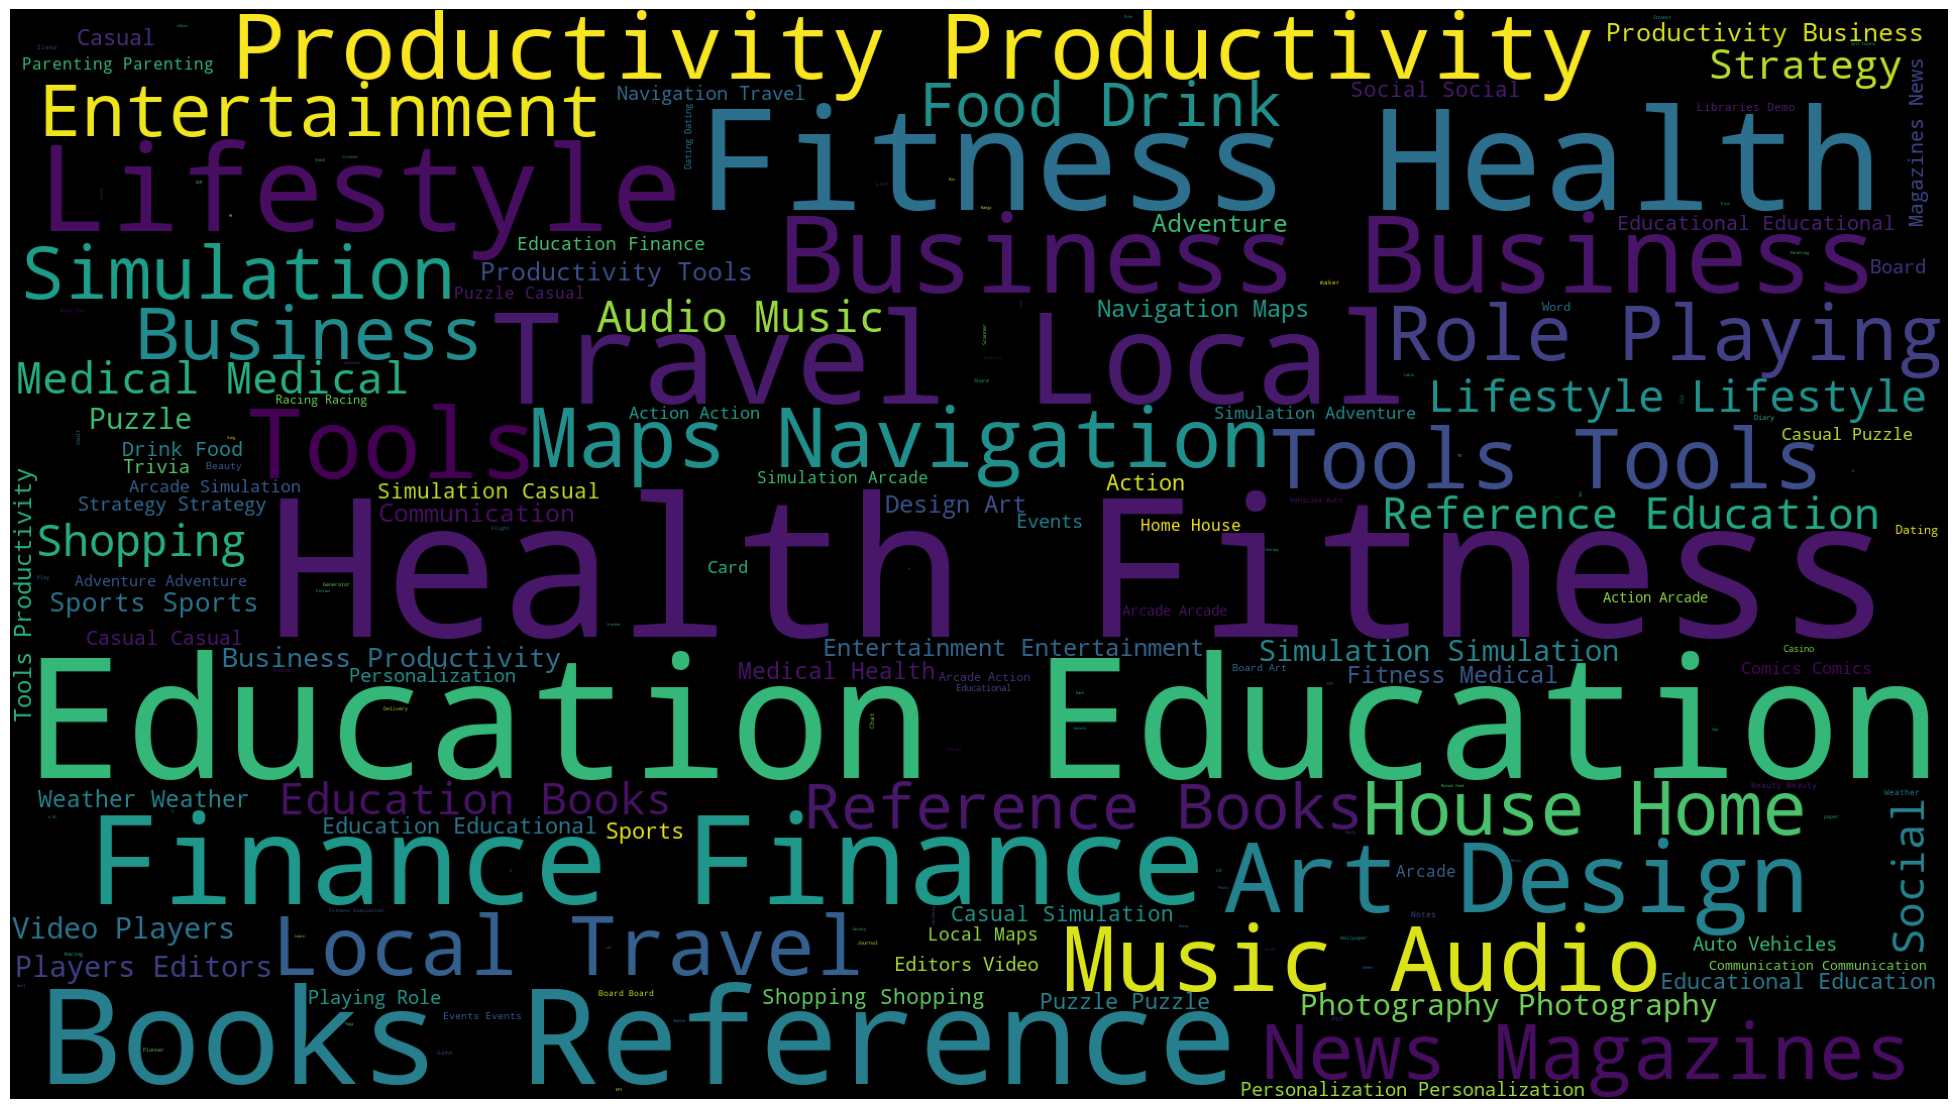

In [55]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

## Category vs Rating Analysis

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

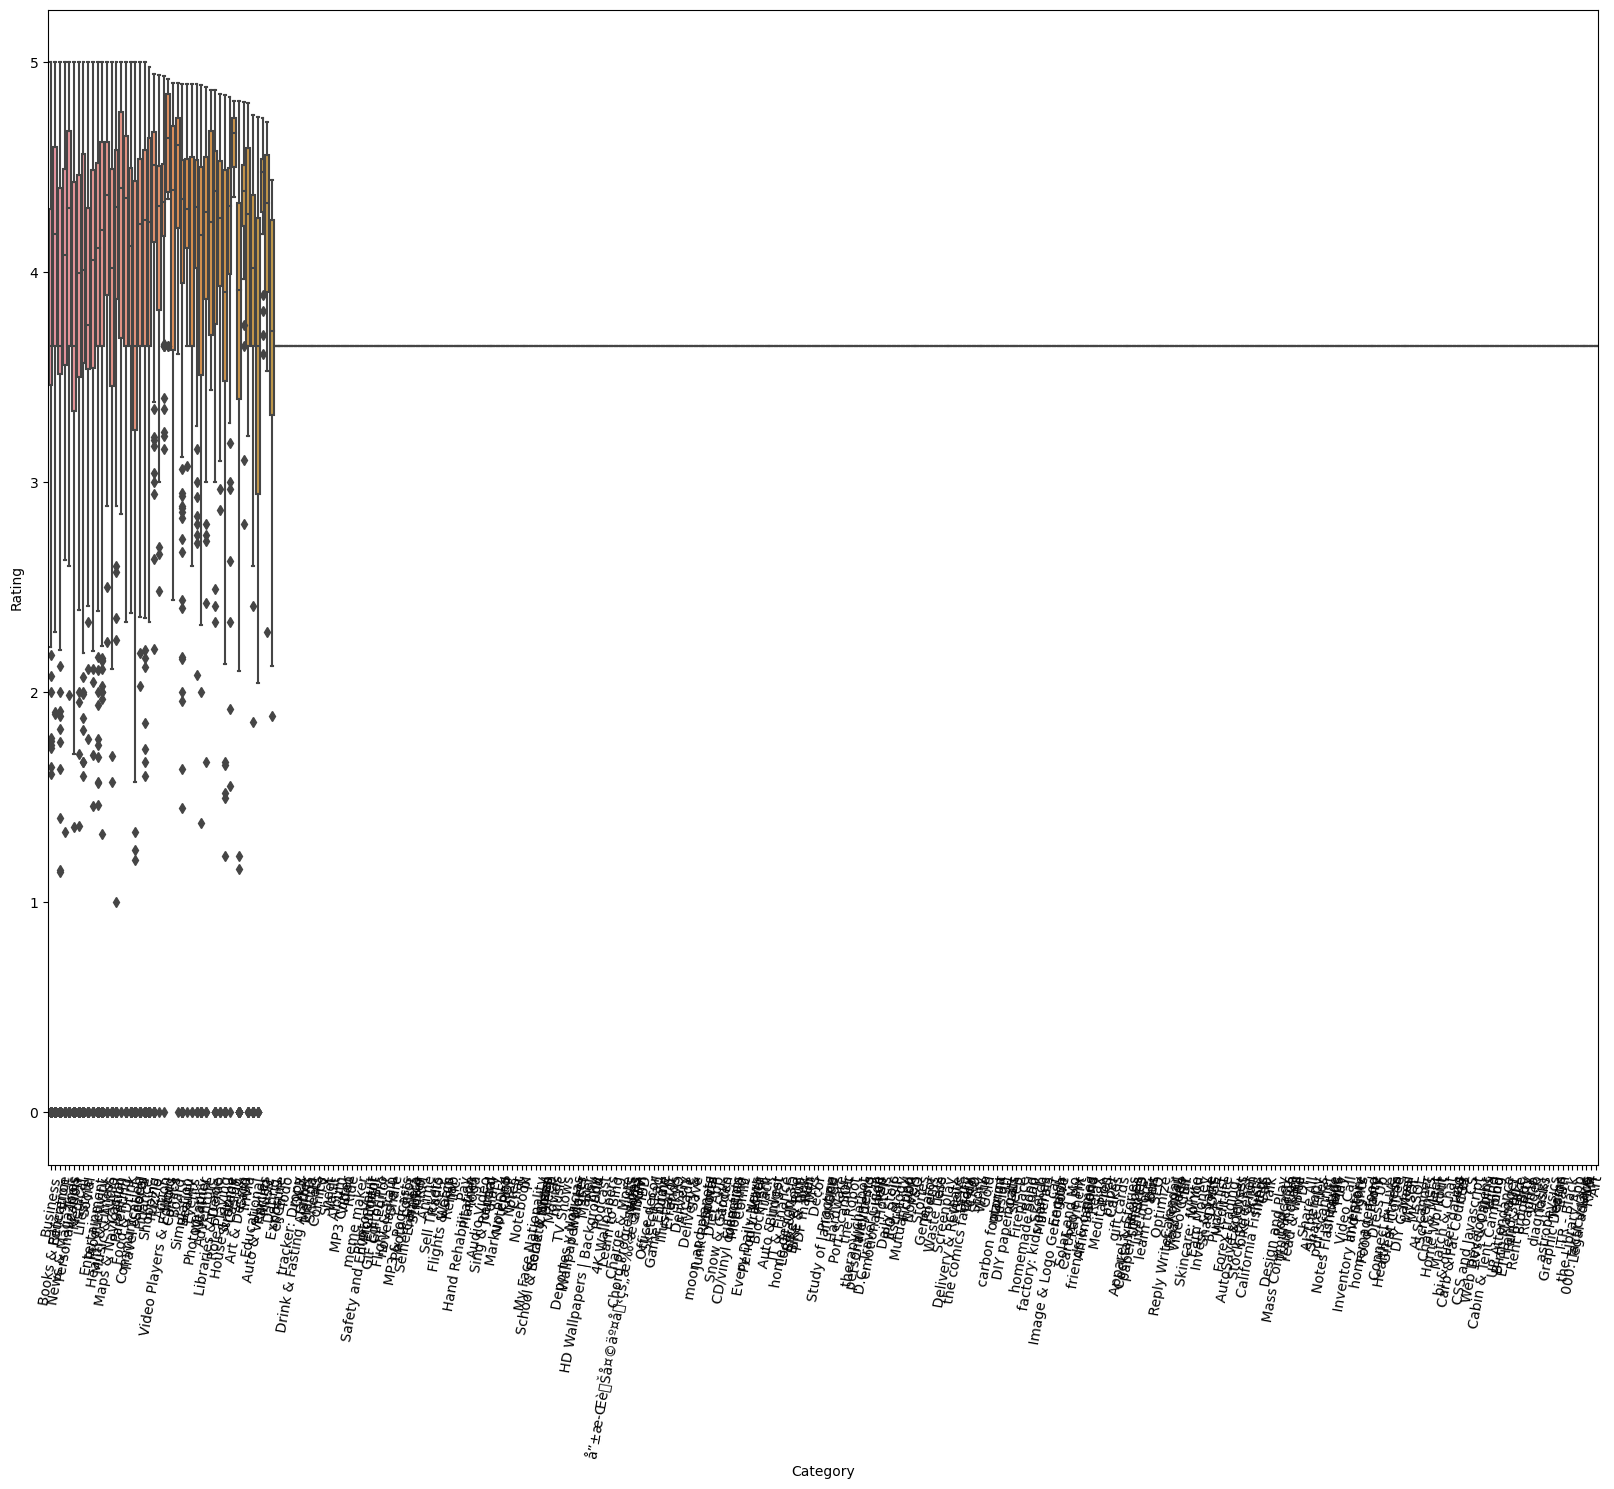

In [56]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Category',data = df.sort_values('Rating',ascending=False))
plt.xticks(rotation=80)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

## Type Column

In [57]:
df['Type'].value_counts()

Type
Free              11099
Paid                228
Unknown              80
100,000+             37
10,000,000+          36
1,000,000+           32
10,000+              24
5,000,000+           17
500,000+             16
50,000+              15
50,000,000+          15
100,000,000+         14
5,000+                7
1,000+                6
500+                  3
1,000,000,000+        2
100+                  2
221                   1
60103                 1
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Free'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, '10,000,000+'),
  Text(3, 0, 'Paid'),
  Text(4, 0, '50,000,000+'),
  Text(5, 0, '100,000,000+'),
  Text(6, 0, '5,000,000+'),
  Text(7, 0, '1,000,000,000+'),
  Text(8, 0, '1,000,000+'),
  Text(9, 0, '50,000+'),
  Text(10, 0, '221'),
  Text(11, 0, '500,000+'),
  Text(12, 0, '100,000+'),
  Text(13, 0, '60103'),
  Text(14, 0, '5,000+'),
  Text(15, 0, '10,000+'),
  Text(16, 0, '500+'),
  Text(17, 0, '1,000+'),
  Text(18, 0, '100+')])

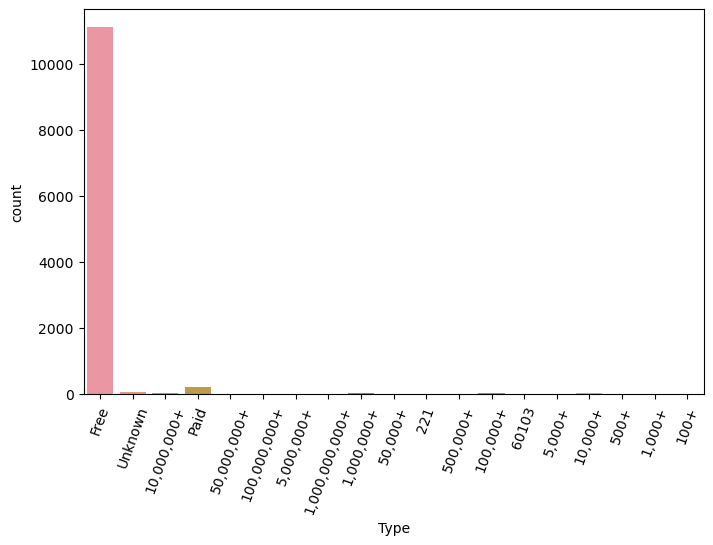

In [58]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=df)
plt.xticks(rotation=70)

<Axes: ylabel='count'>

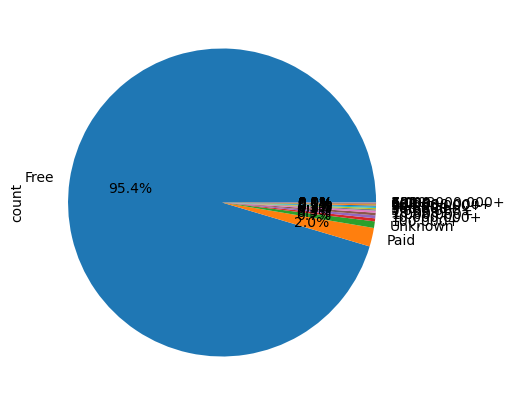

In [59]:
df["Type"].value_counts().plot.pie(autopct = "%1.1f%%")

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

## Type vs Rating Analysis

<Figure size 1500x800 with 0 Axes>

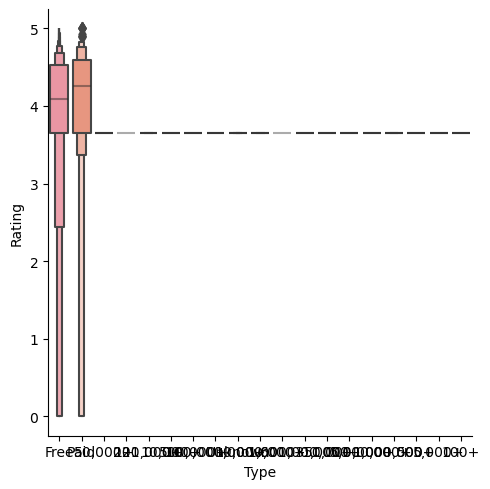

In [60]:
plt.figure(figsize=(15,8))
sns.catplot(y='Rating',x='Type',data = df.sort_values('Rating',ascending=False),kind='boxen')

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

## Content Rating Column

In [61]:
df['Content Rating'].value_counts()

Content Rating
Everyone           9640
Teen               1075
Everyone 10+        335
Mature 17+          275
0                   225
Free                 80
Adults only 18+       2
5,000,000+            1
2.99                  1
500,000,000+          1
Name: count, dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

## Content Rating vs Rating Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Everyone 10+'),
  Text(2, 0, 'Teen'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, '0'),
  Text(6, 0, '5,000,000+'),
  Text(7, 0, 'Free'),
  Text(8, 0, '500,000,000+'),
  Text(9, 0, '2.99')])

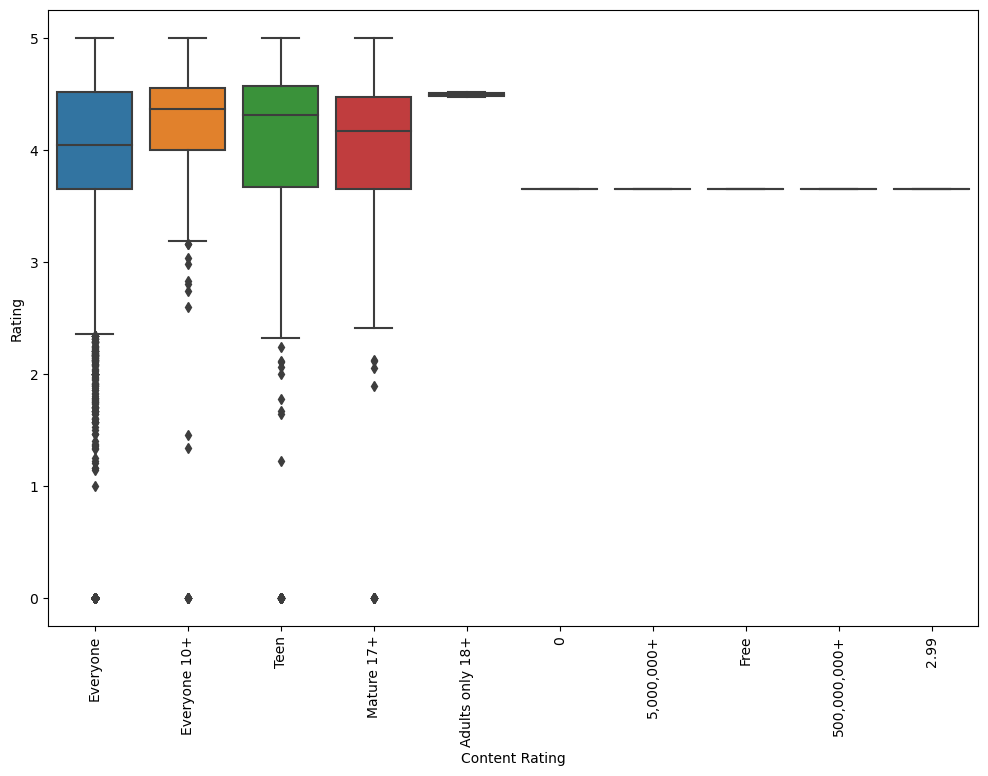

In [62]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Rating',x='Content Rating',data = df.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)

<Axes: xlabel='Content Rating', ylabel='Install'>

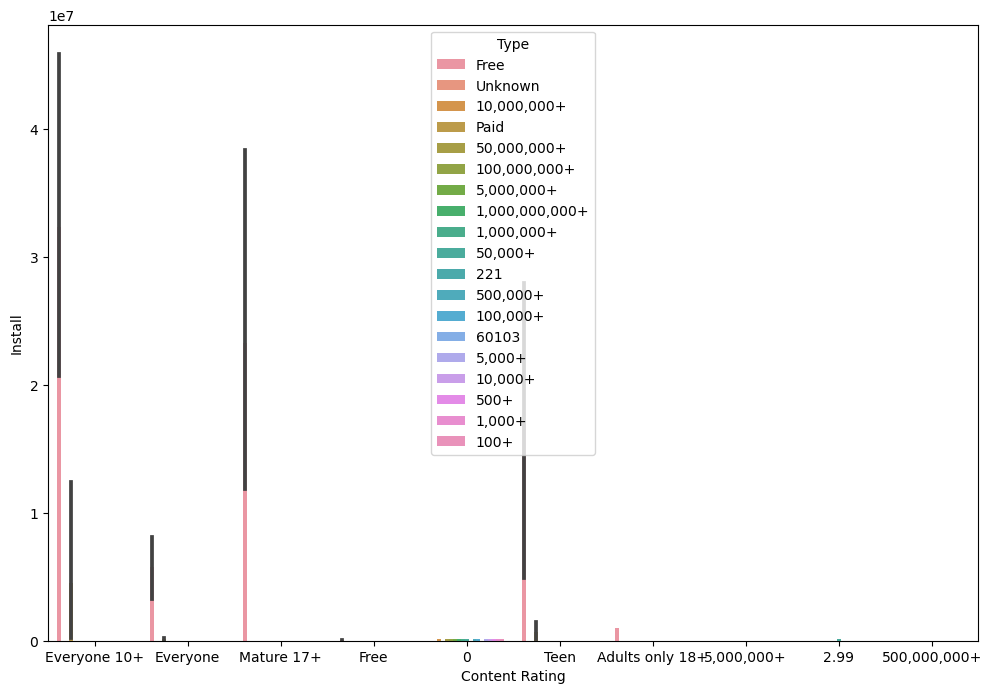

In [63]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Install", hue="Type", data=df)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

## Genres Column

In [64]:
df['Genres'].value_counts()

Genres
Education                  1581
Health & Fitness            905
Business                    787
Tools                       677
Productivity                657
Finance                     586
Lifestyle                   559
Simulation                  442
Books & Reference           412
Travel & Local              372
Medical                     280
Casual                      267
Entertainment               254
Puzzle                      226
Art & Design                210
Shopping                    205
Social                      199
Music & Audio               197
Sports                      194
Educational                 193
Everyone                    186
Photography                 171
Maps & Navigation           164
Strategy                    155
News & Magazines            138
Role Playing                138
House & Home                131
Adventure                   123
Weather                     122
Action                      119
Food & Drink                116
A

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

## Current ver Column

In [65]:
df['Current Ver'].value_counts()

Current Ver
Varies with device    515
1                     155
1.0.0                 124
1.0.2                  93
1.1                    76
                     ... 
2025.3.1                1
6.20.2                  1
5.20.14                 1
3.0.57                  1
12.3.3                  1
Name: count, Length: 5012, dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

## Android Ver Column

In [66]:
df['Android Ver'].value_counts()


Android Ver
Unknown               11327
Varies with device       13
5.4                       5
March 27, 2025            5
April 01, 2025            5
                      ...  
2.9.8                     1
28.3                      1
3.0.1                     1
4.3.7                     1
1.0.20                    1
Name: count, Length: 250, dtype: int64

In [67]:
# Function to create a scatter plot
def scatters(col1, col2):
    # Create a scatter plot using Seaborn
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.scatterplot(data=df, x=col1, y=col2, hue="Type")
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

# Function to create a KDE plot
def kde_plot(feature):
    # Create a FacetGrid for KDE plots using Seaborn
    grid = sns.FacetGrid(df, hue="Type", aspect=2)

    # Map KDE plots for the specified feature
    grid.map(sns.kdeplot, feature)

    # Add a legend to distinguish between categories
    grid.add_legend()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

## kde-Plot Analysis

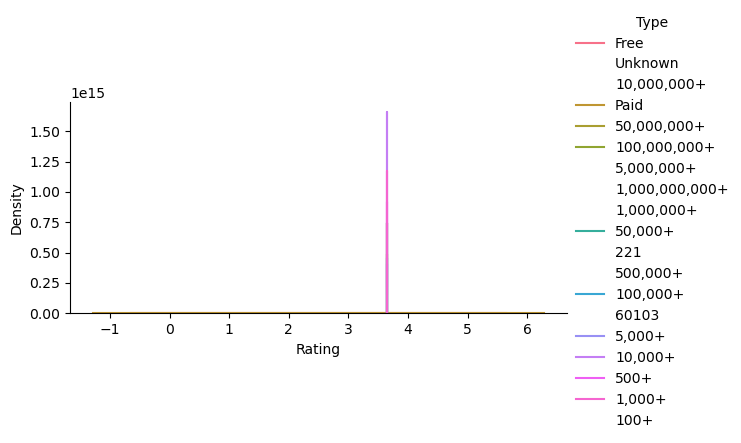

In [68]:
kde_plot('Rating')

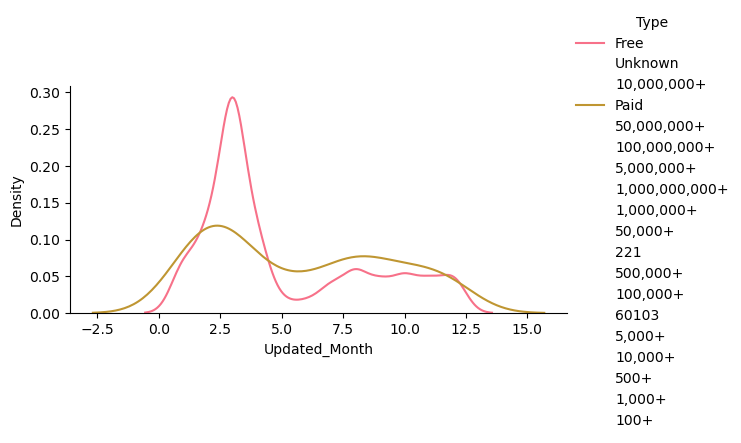

In [70]:
kde_plot('Updated_Month')

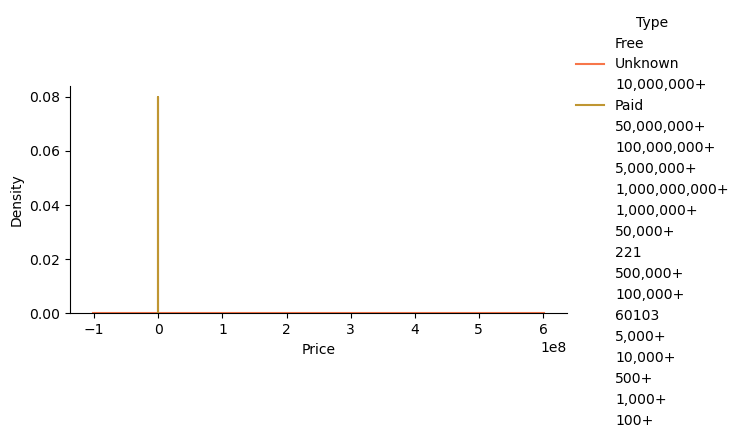

In [71]:
kde_plot('Price')

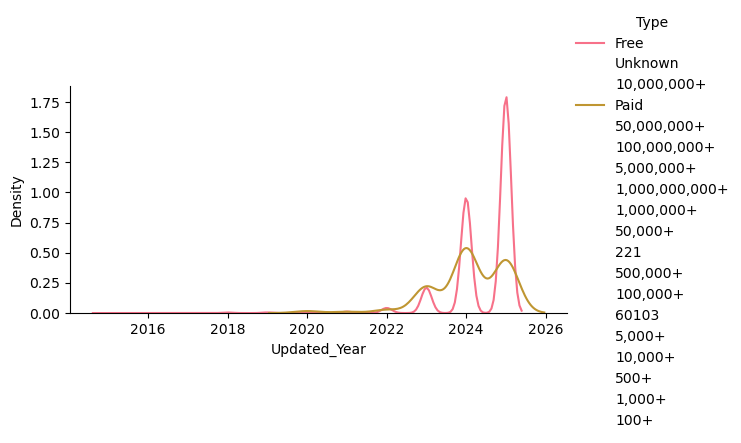

In [72]:
kde_plot('Updated_Year')

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

## Scatter plot Analysis

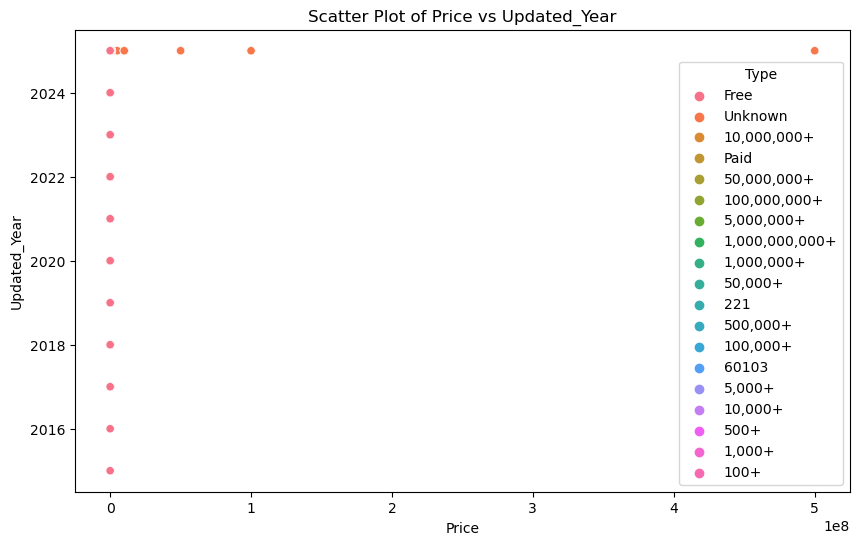

In [73]:
scatters('Price', 'Updated_Year')

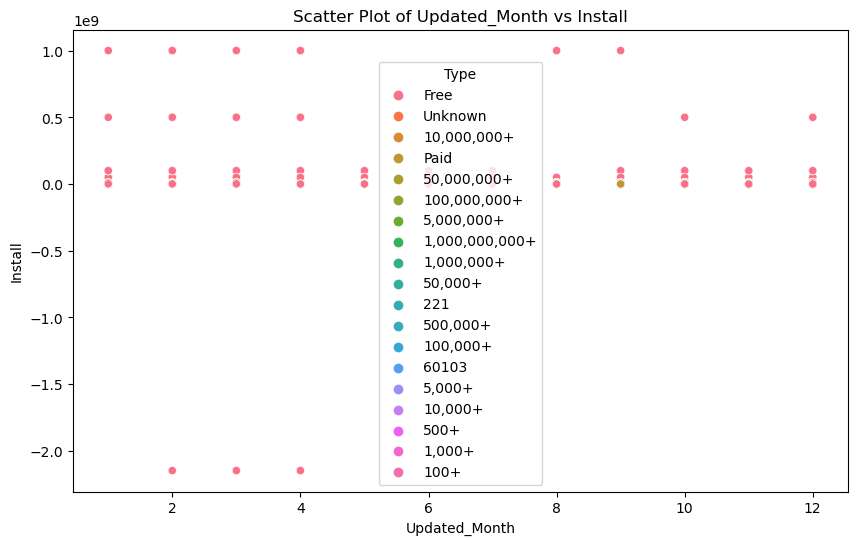

In [76]:
scatters('Updated_Month', 'Install')

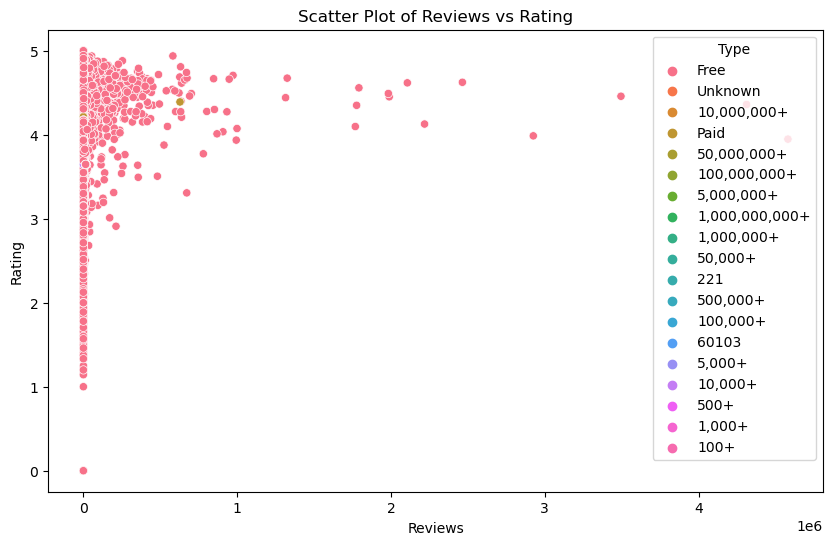

In [77]:
scatters('Reviews', 'Rating')

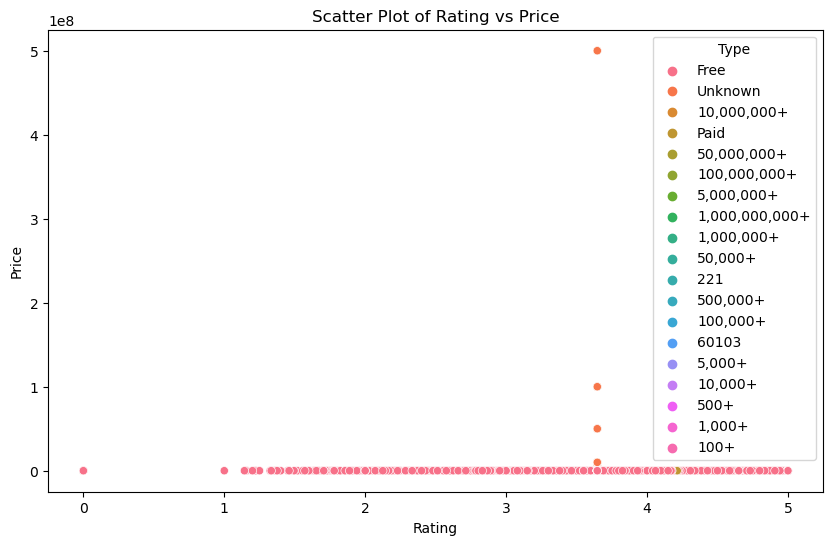

In [78]:
scatters('Rating', 'Price')

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

## Further Analysis

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

### Apps with a 5.0 Rating

In [79]:
df_rating_5 = df[df.Rating == 5.]
print(f'There are {df_rating_5.shape[0]} apps having rating of 5.0')

There are 75 apps having rating of 5.0


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

### Installs

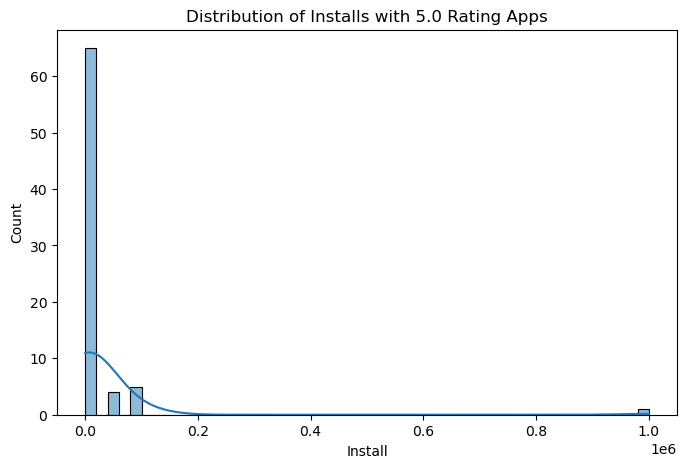

In [80]:
sns.histplot(data=df_rating_5, x='Install', kde=True, bins=50)

plt.title('Distribution of Installs with 5.0 Rating Apps')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

**Despite the full ratings, the number of installations for the majority of the apps is low. Hence, those apps cannot be considered the best products.**

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

### Reviews

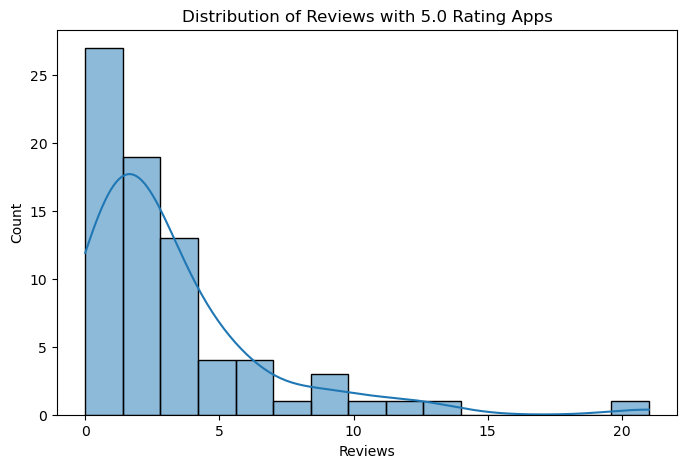

In [81]:
sns.histplot(data=df_rating_5, x='Reviews', kde=True)
plt.title('Distribution of Reviews with 5.0 Rating Apps')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

**The distribution is right-skewed which shows applications with few reviews having 5.0 ratings, which is misleading.**

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

### Category

In [82]:
df_rating_5_cat =  df_rating_5['Category'].value_counts().reset_index()

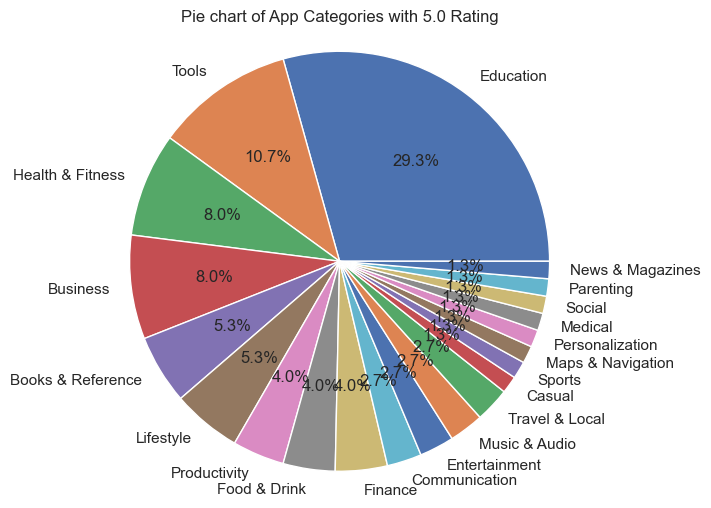

In [83]:
# Create a pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.pie(df_rating_5_cat.iloc[:, 1], labels=df_rating_5_cat.iloc[:, 0], autopct='%1.1f%%')
plt.title('Pie chart of App Categories with 5.0 Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

**Family, LifeStyle and Medical apps receive the most 5.0 ratings on Google Play Store with Family representing about quater of whole.**

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

### Type

In [84]:
df_rating_5_type =  df_rating_5['Type'].value_counts().reset_index()

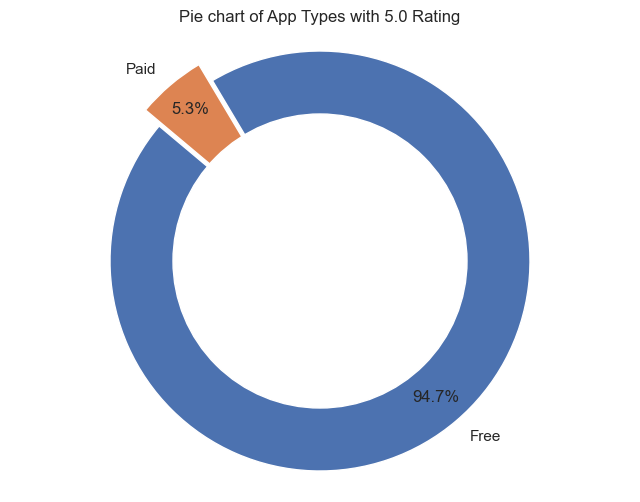

In [85]:
# Create a pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Data for the pie chart
sizes = df_rating_5_type.iloc[:, 1]
labels = df_rating_5_type.iloc[:, 0]

# Pull a slice out by exploding it
explode = (0, 0.1)  # Adjust the second value to control the pull-out distance

# Create the pie chart with default colors
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Pie chart of App Types with 5.0 Rating')

# Show the pie chart
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

**Almost 90% of the 5.0 rating apps are free on Goolge Play Store.**

Text(0.5, 1.0, 'Time series plot of Last Updates')

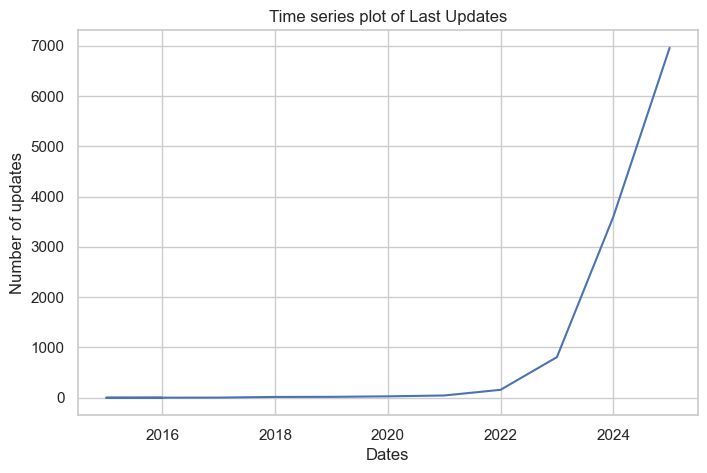

In [86]:
freq= pd.Series()
freq=df['Updated_Year'].value_counts()
freq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;"> Feature Pruning</p>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

We decide to prune the following features:

* App : App names are of no value for the model
* Genres : The informations it stores is same as the feature Category
* Current Ver : Current Version of an app doesn't hold significant value.
* Android Ver: Android Version of an app doesn't hold significant value.

In [87]:
pruned_features = ['App', 'Android Ver', 'Size']

# Feature Engineering

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11635 entries, 0 to 11634
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             11635 non-null  object 
 1   Category        11635 non-null  object 
 2   Rating          11635 non-null  float64
 3   Reviews         11635 non-null  float64
 4   Size            11635 non-null  object 
 5   Install         11635 non-null  int32  
 6   Type            11635 non-null  object 
 7   Price           11635 non-null  float64
 8   Content Rating  11635 non-null  object 
 9   Genres          11635 non-null  object 
 10  Current Ver     11635 non-null  object 
 11  Android Ver     11635 non-null  object 
 12  Updated_Month   11635 non-null  float64
 13  Updated_Year    11635 non-null  float64
dtypes: float64(5), int32(1), object(8)
memory usage: 1.2+ MB


In [89]:
df['Reviews_per_Install'] = df['Reviews'] / (df['Install'] + 1)
df['Price_Reviews_Interaction'] = df['Price'] * df['Reviews']
df['Price_Category'] = pd.cut(df['Price'], bins=[-0.01, 0, 5, 20, 100], labels=['Free', 'Cheap', 'Moderate', 'Expensive'])
df['Installs_Bin'] = pd.cut(df['Install'], bins=[0, 1000, 10000, 100000, 1000000, 10000000], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
def classify_rating(rating):
    if rating < 3.8:
        return 0
    else:
        return 1

df['Rating_Class'] = df['Rating'].apply(classify_rating)

In [90]:
df['Price_Category'] = df['Price_Category'].fillna(df['Price_Category'].mode()[0])
df['Installs_Bin'] = df['Installs_Bin'].fillna(df['Installs_Bin'].mode()[0])


In [91]:
df.isna().sum()

App                          0
Category                     0
Rating                       0
Reviews                      0
Size                         0
Install                      0
Type                         0
Price                        0
Content Rating               0
Genres                       0
Current Ver                  0
Android Ver                  0
Updated_Month                0
Updated_Year                 0
Reviews_per_Install          0
Price_Reviews_Interaction    0
Price_Category               0
Installs_Bin                 0
Rating_Class                 0
dtype: int64

# Remove Outliers

In [92]:

# Hapus outlier sederhana
for col in ['Rating', 'Reviews', 'Install', 'Price','Updated_Month', 'Updated_Year']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]


<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 6 | Data Splitting for Modeling</p>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### We split the dataset into 80% train and 20% test.

In [93]:
target1 = 'Rating'
target2 = 'Rating_Class'

In [94]:
X = df.copy().drop(pruned_features+[target1]+[target2], axis=1)
y1 = df.copy()[target1]
y2 = df.copy()[target2]

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
## Label Encoding

In [96]:
print("X_train columns:", X_train.columns.tolist())
print("X_test columns:", X_test.columns.tolist())

X_train columns: ['Category', 'Reviews', 'Install', 'Type', 'Price', 'Content Rating', 'Genres', 'Current Ver', 'Updated_Month', 'Updated_Year', 'Reviews_per_Install', 'Price_Reviews_Interaction', 'Price_Category', 'Installs_Bin']
X_test columns: ['Category', 'Reviews', 'Install', 'Type', 'Price', 'Content Rating', 'Genres', 'Current Ver', 'Updated_Month', 'Updated_Year', 'Reviews_per_Install', 'Price_Reviews_Interaction', 'Price_Category', 'Installs_Bin']


In [97]:
cat_features = [col for col in cat_features if col in X_train.columns]


In [98]:
le_dict = defaultdict()


In [99]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le_dict = {}

# Tentukan kolom kategori yang perlu dienkode
categorical_cols = ['Category', 'Type', 'Content Rating', 'Price_Category', 'Installs_Bin', 'Current Ver', 'Genres']  # Ganti dengan kolom kategori yang benar

for col in categorical_cols:
    le = LabelEncoder()

    # Konversi hanya kolom kategori ke string
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

    # Encode hanya kolom kategori
    X_train[col] = le.fit_transform(X_train[col])
    X_train[col] = X_train[col].astype('category')

    # Simpan label yang dikenal
    known_labels = set(le.classes_)

    # Ganti nilai yang tidak dikenali dengan 'Unknown'
    X_test[col] = X_test[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # Transformasi termasuk 'Unknown' jika perlu
    if 'Unknown' not in le.classes_:
        le.classes_ = np.append(le.classes_, 'Unknown')

    X_test[col] = le.transform(X_test[col])
    X_test[col] = X_test[col].astype('category')

    le_dict[col] = le



In [101]:
X_train.head()

,Category,Reviews,Install,Type,Price,Content Rating,Genres,Current Ver,Updated_Month,Updated_Year,Reviews_per_Install,Price_Reviews_Interaction,Price_Category,Installs_Bin
9251,182,14464.335757,10000,14,0.0,4,26,485,10.0,2024.0,1.446289,0.0,0,1
2555,201,14464.335757,10000,14,0.0,3,46,1042,12.0,2024.0,1.446289,0.0,0,1
9568,186,598.000000,1000000,14,0.0,3,31,2035,1.0,2025.0,0.000598,0.0,0,0
6778,167,13.000000,50000,14,0.0,3,9,1353,3.0,2025.0,0.000260,0.0,0,2
3005,200,651.000000,1000000,14,0.0,3,44,285,8.0,2023.0,0.000651,0.0,0,0


In [102]:
X_test.head()

,Category,Reviews,Install,Type,Price,Content Rating,Genres,Current Ver,Updated_Month,Updated_Year,Reviews_per_Install,Price_Reviews_Interaction,Price_Category,Installs_Bin
7928,167,14464.335757,5000,14,0.0,3,9,139,7.0,2024.0,2.892289,0.0,0,1
4318,192,1786.000000,1000000,14,0.0,3,36,2460,3.0,2025.0,0.001786,0.0,0,0
1990,182,1109.000000,500000,14,0.0,3,26,2935,4.0,2025.0,0.002218,0.0,0,0
8431,179,1107.000000,1000000,14,0.0,3,23,2935,3.0,2025.0,0.001107,0.0,0,0
2850,192,575.000000,100000,14,0.0,3,36,2935,11.0,2024.0,0.005750,0.0,0,2


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
## Standardization

In [103]:
# Converting and adding "Last Updated Month" to categorical features
categorical_features = ['Category','Type','Content Rating','Updated_Month', 'Price_Category', 'Installs_Bin', 'Current Ver', 'Genres']
X_train['Updated_Month'] = X_train['Updated_Month'].astype('category')
X_test['Updated_Month'] = X_test['Updated_Month'].astype('category')

# Listing numeric features to scale
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

In [104]:
numeric_features

Index(['Reviews', 'Install', 'Price', 'Updated_Year', 'Reviews_per_Install',
       'Price_Reviews_Interaction'],
      dtype='object')

In [105]:
scaler = StandardScaler()

# Fitting and transforming the Training data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# X_train = scaler.fit_transform(X_train)

# Only transforming the Test data
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
# X_test = scaler.transform(X_test)

<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 7 | Modeling</p>

<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 7.1 |</span><span style='color:#ff6200'> Regression</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### Creating dataframe for metrics

In [128]:
models = ['Linear', 'KNN', 'Random Forest','CatBoost']
datasets = ['train', 'test']
metrics = ['RMSE', 'MAE', 'R2']

multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])

df_metrics_reg = pd.DataFrame(index=multi_index,
                          columns=['value'])

In [129]:
df_metrics_reg

value
model         dataset metric      
Linear        train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
KNN           train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
Random Forest train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
CatBoost      train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
## Linear Regressor

In [130]:
lr = LinearRegression()
lr.fit(X_train, y_train1)

LinearRegression()

In [131]:
df_metrics_reg.loc['Linear', 'train', 'R2'] = lr.score(X_train, y_train1)
df_metrics_reg.loc['Linear', 'test', 'R2'] = lr.score(X_test, y_test1)

In [132]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

df_metrics_reg.loc['Linear', 'train', 'MAE'] = mean_absolute_error(y_train1, y_train_pred)
df_metrics_reg.loc['Linear', 'test', 'MAE'] = mean_absolute_error(y_test1, y_test_pred)

df_metrics_reg.loc['Linear', 'train', 'RMSE'] = mean_squared_error(y_train1, y_train_pred) ** 0.5
df_metrics_reg.loc['Linear', 'test', 'RMSE'] = mean_squared_error(y_test1, y_test_pred) ** 0.5

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### KNeighbors Regressor

In [133]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train1)

KNeighborsRegressor()

In [134]:
df_metrics_reg.loc['KNN', 'train', 'R2'] = knn.score(X_train, y_train1)
df_metrics_reg.loc['KNN', 'test', 'R2'] = knn.score(X_test, y_test1)

In [135]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

df_metrics_reg.loc['KNN', 'train', 'MAE'] = mean_absolute_error(y_train1, y_train_pred)
df_metrics_reg.loc['KNN', 'test', 'MAE'] = mean_absolute_error(y_test1, y_test_pred)

df_metrics_reg.loc['KNN', 'train', 'RMSE'] = mean_squared_error(y_train1, y_train_pred) ** 0.5
df_metrics_reg.loc['KNN', 'test', 'RMSE'] = mean_squared_error(y_test1, y_test_pred) ** 0.5

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### Random Forest Regressor

In [136]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train1)

RandomForestRegressor(max_depth=2, random_state=0)

In [137]:
df_metrics_reg.loc['Random Forest', 'train', 'R2'] = rf.score(X_train, y_train1)
df_metrics_reg.loc['Random Forest', 'test', 'R2'] = rf.score(X_test, y_test1)

In [138]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

df_metrics_reg.loc['Random Forest', 'train', 'MAE'] = mean_absolute_error(y_train1, y_train_pred)
df_metrics_reg.loc['Random Forest', 'test', 'MAE'] = mean_absolute_error(y_test1, y_test_pred)

df_metrics_reg.loc['Random Forest', 'train', 'RMSE'] = mean_squared_error(y_train1, y_train_pred) ** 0.5
df_metrics_reg.loc['Random Forest', 'test', 'RMSE'] = mean_squared_error(y_test1, y_test_pred) ** 0.5

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### CatBoost Regressor

In [139]:
from catboost import CatBoostRegressor

cat_features = ['Category', 'Type', 'Content Rating','Genres','Current Ver','Updated_Month', 'Price_Category','Installs_Bin']  # contoh kalau ada banyak
for col in cat_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Inisialisasi model CatBoost
catboost_model = CatBoostRegressor(depth=2, random_state=0, verbose=0)

# Training model
catboost_model.fit(X_train, y_train1, cat_features=cat_features)


In [140]:
df_metrics_reg.loc['CatBoost', 'train', 'R2'] = catboost_model.score(X_train, y_train1)
df_metrics_reg.loc['CatBoost', 'test', 'R2'] = catboost_model.score(X_test, y_test1)


In [141]:
# Prediksi dengan model CatBoost
y_train_pred = catboost_model.predict(X_train)
y_test_pred = catboost_model.predict(X_test)

# Simpan MAE ke df_metrics_reg
df_metrics_reg.loc['CatBoost', 'train', 'MAE'] = mean_absolute_error(y_train1, y_train_pred)
df_metrics_reg.loc['CatBoost', 'test', 'MAE'] = mean_absolute_error(y_test1, y_test_pred)

# Simpan RMSE ke df_metrics_reg
df_metrics_reg.loc['CatBoost', 'train', 'RMSE'] = mean_squared_error(y_train1, y_train_pred) ** 0.5
df_metrics_reg.loc['CatBoost', 'test', 'RMSE'] = mean_squared_error(y_test1, y_test_pred) ** 0.5


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### Regression Evaluation

In [142]:
# Rounding the values

df_metrics_reg['value'] = df_metrics_reg['value'].apply(lambda v: round(v, ndigits=3))
df_metrics_reg

value
model         dataset metric       
Linear        train   RMSE    0.502
                      MAE     0.364
                      R2      0.159
              test    RMSE    0.492
                      MAE     0.362
                      R2      0.163
KNN           train   RMSE    0.466
                      MAE     0.358
                      R2      0.275
              test    RMSE    0.563
                      MAE     0.447
                      R2     -0.096
Random Forest train   RMSE    0.493
                      MAE     0.348
                      R2      0.189
              test    RMSE    0.485
                      MAE     0.343
                      R2      0.187
CatBoost      train   RMSE    0.450
                      MAE     0.308
                      R2      0.325
              test    RMSE    0.468
                      MAE     0.328
                      R2      0.243

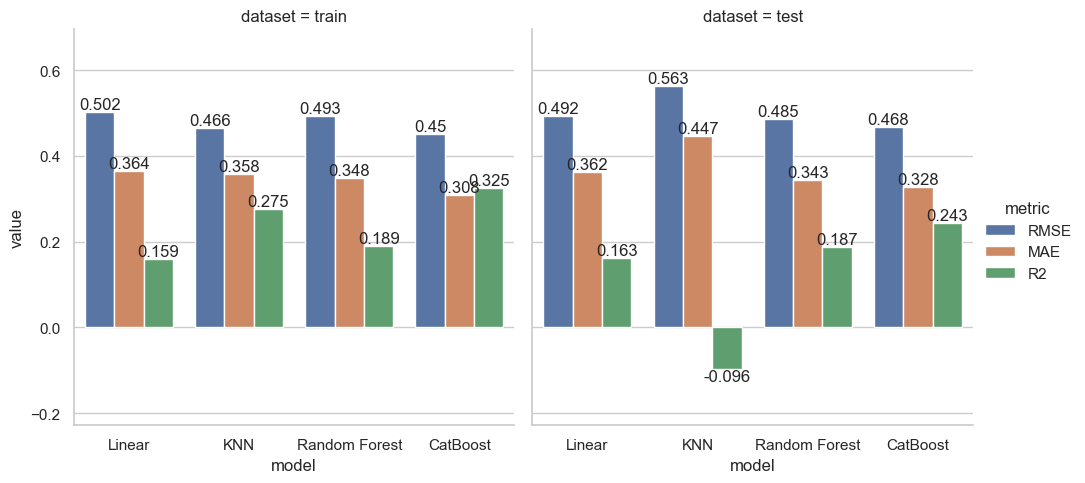

In [143]:
data = df_metrics_reg.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='value', hue='metric')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
* **The Regression predictions don't hold up very well!**

* **We can interpret that the dataset is not suitable for regression problem.**

<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 7.2 |</span><span style='color:#ff6200'> Classification</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    

### Let's frame it as a classification problem statement.

### Converting the Rating from continuous to discrete

In [144]:
y_train_int = y_train2
y_test_int = y_test2

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### Creating dataframe for metrics

In [145]:
models = ['Logistic Regression', 'KNN', 'Random Forest', 'SVM', 'Ridge', 'CatBoost', 'LightGBM']
datasets = ['train', 'test']

multi_index = pd.MultiIndex.from_product([models, datasets],
                                         names=['model', 'dataset'])

df_metrics_clf = pd.DataFrame(index=multi_index,
                          columns=['accuracy %'])

In [146]:
df_metrics_clf

accuracy %
model               dataset           
Logistic Regression train          NaN
                    test           NaN
KNN                 train          NaN
                    test           NaN
Random Forest       train          NaN
                    test           NaN
SVM                 train          NaN
                    test           NaN
Ridge               train          NaN
                    test           NaN
CatBoost            train          NaN
                    test           NaN
LightGBM            train          NaN
                    test           NaN

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### Logistic Regression Classifier

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# Tentukan parameter yang ingin dituning
param_distributions = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': uniform(0.01, 10),  # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],
    'max_iter': [100, 200, 300, 500],
    'l1_ratio': uniform(0, 1)  # Hanya digunakan jika penalty='elasticnet'
}

# Inisialisasi model Logistic Regression
lr = LogisticRegression()

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    lr,
    param_distributions=param_distributions,
    n_iter=50,  # Semakin besar, semakin baik eksplorasinya
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Jalankan RandomizedSearchCV
random_search.fit(X_train, y_train_int)

# Cetak parameter terbaik
print("Best parameters found: ", random_search.best_params_)

# Gunakan model terbaik untuk prediksi
best_lr_clf = random_search.best_estimator_

# Latih model terbaik
best_lr_clf.fit(X_train, y_train_int)

# Kalau mau cek akurasi di data training dan validasi
from sklearn.metrics import accuracy_score

y_train_pred = best_lr_clf.predict(X_train)
print("Training accuracy:", accuracy_score(y_train_int, y_train_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'C': 3.119823217156622, 'l1_ratio': 0.32518332202674705, 'max_iter': 300, 'penalty': None, 'solver': 'newton-cg'}
Training accuracy: 0.8258812010443864


In [148]:
from sklearn.linear_model import LogisticRegression

# Gunakan hyperparameter terbaik yang didapat dari RandomizedSearchCV
best_params_lr ={'C': 3.119823217156622, 'l1_ratio': 0.32518332202674705, 'max_iter': 300, 'penalty': None, 'solver': 'newton-cg'}

# Buat model Logistic Regression dengan parameter terbaik
lr_clf = LogisticRegression(**best_params_lr)

# Latih model dengan data training
lr_clf.fit(X_train, y_train_int)

LogisticRegression(C=3.119823217156622, l1_ratio=0.32518332202674705,
                   max_iter=300, penalty=None, solver='newton-cg')

In [149]:
df_metrics_clf.loc['Logistic Regression', 'train'] = lr_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Logistic Regression', 'test'] = lr_clf.score(X_test, y_test_int)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### KNeighbors Classifier

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Definisikan model awal
knn = KNeighborsClassifier()

# Tentukan parameter yang mau di-tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # p=1 untuk manhattan, p=2 untuk euclidean
}

# Setup GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit ke data training
grid_search.fit(X_train, y_train_int)

# Print hasil terbaik
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Gunakan model terbaik
best_knn = grid_search.best_estimator_

# Evaluasi model di data test
test_accuracy = best_knn.score(X_test, y_test_int)
print("Test set accuracy: ", test_accuracy)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best accuracy:  0.6971302060791691
Test set accuracy:  0.7018917155903457


In [151]:
best_params_knn = {'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


knn_clf = KNeighborsClassifier(**best_params_knn)
knn_clf.fit(X_train, y_train_int)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1, weights='distance')

In [152]:
df_metrics_clf.loc['KNN', 'train'] = knn_clf.score(X_train, y_train_int)
df_metrics_clf.loc['KNN', 'test'] = knn_clf.score(X_test, y_test_int)


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### Random Forest Classifier

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Model dasar
rf_clf = RandomForestClassifier()

# Parameter distribusi
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Randomized search
random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dist,
                                   n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train_int)

print("Best parameters found: ", random_search.best_params_)
print("Best estimator: ", random_search.best_estimator_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 12, 'min_samples_split': 13, 'n_estimators': 439}
Best estimator:  RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=12, min_samples_split=13,
                       n_estimators=439)


In [154]:
best_params_rf = {'bootstrap': True, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 7, 'n_estimators': 346}

rf_clf = RandomForestClassifier(**best_params_rf)
rf_clf.fit(X_train, y_train_int)

RandomForestClassifier(max_depth=6, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=346)

In [155]:
df_metrics_clf.loc['Random Forest', 'train'] = rf_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Random Forest', 'test'] = rf_clf.score(X_test, y_test_int)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### SVM Classifier

In [157]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train_int)


SVC()

In [158]:
df_metrics_clf.loc['SVM', 'train'] = svm_clf.score(X_train, y_train_int)
df_metrics_clf.loc['SVM', 'test'] = svm_clf.score(X_test, y_test_int)


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### Ridge Classifier

In [160]:
from sklearn.linear_model import RidgeClassifier

ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train, y_train_int)

RidgeClassifier()

In [161]:
df_metrics_clf.loc['Ridge', 'train'] = ridge_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Ridge', 'test'] = ridge_clf.score(X_test, y_test_int)


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### CatBoost Classifier

In [163]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# 1. Deteksi kolom kategori
cat_features = X_train.select_dtypes(include=['category', 'object']).columns.tolist()

# 2. Pastikan kolom kategori bertipe string
for col in cat_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

best_params_cb = {'random_strength': 20, 'learning_rate': 0.1711111111111111, 'l2_leaf_reg': 1, 'iterations': 100, 'depth': 4, 'border_count': 128, 'bagging_temperature': 0.5}


# 3. Inisialisasi model
catboost_clf = CatBoostClassifier(**best_params_cb)

# 4. Training model
catboost_clf.fit(X_train, y_train_int, cat_features=cat_features)

0:	learn: 0.6301324	total: 56.6ms	remaining: 5.6s
1:	learn: 0.5770979	total: 97.2ms	remaining: 4.76s
2:	learn: 0.5498690	total: 132ms	remaining: 4.28s
3:	learn: 0.5371300	total: 163ms	remaining: 3.92s
4:	learn: 0.5312984	total: 203ms	remaining: 3.85s
5:	learn: 0.5240490	total: 239ms	remaining: 3.74s
6:	learn: 0.5135080	total: 278ms	remaining: 3.69s
7:	learn: 0.5036192	total: 317ms	remaining: 3.65s
8:	learn: 0.5008353	total: 356ms	remaining: 3.6s
9:	learn: 0.4994034	total: 406ms	remaining: 3.65s
10:	learn: 0.4980059	total: 445ms	remaining: 3.6s
11:	learn: 0.4884038	total: 484ms	remaining: 3.55s
12:	learn: 0.4846014	total: 515ms	remaining: 3.44s
13:	learn: 0.4805433	total: 547ms	remaining: 3.36s
14:	learn: 0.4772072	total: 584ms	remaining: 3.31s
15:	learn: 0.4767923	total: 619ms	remaining: 3.25s
16:	learn: 0.4687178	total: 637ms	remaining: 3.11s
17:	learn: 0.4669159	total: 691ms	remaining: 3.15s
18:	learn: 0.4666014	total: 731ms	remaining: 3.12s
19:	learn: 0.4552848	total: 773ms	remainin

In [164]:
df_metrics_clf.loc['CatBoost', 'train'] = catboost_clf.score(X_train, y_train_int)
df_metrics_clf.loc['CatBoost', 'test'] = catboost_clf.score(X_test, y_test_int)


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### LightGBM Classifier

In [166]:
from lightgbm import LGBMClassifier

# 1. Deteksi kolom kategori
cat_features = X_train.select_dtypes(include=['category', 'object']).columns.tolist()

# 2. Pastikan kolom kategori bertipe 'category' dtype
for col in cat_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

# 3. Inisialisasi model
lgbm_clf = LGBMClassifier(verbose=0, random_state=42, categorical_feature=cat_features)

# 4. Pastikan y bertipe integer
y_train_int = y_train2.astype(int)
y_test_int = y_test2.astype(int)

# 5. Training model
lgbm_clf.fit(X_train, y_train_int)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: Rating,Genres,Current
[LightGBM] [Warning] Unknown parameter: Ver,Updated_Month,Price_Category,Installs_Bin
[LightGBM] [Warning] categorical_feature is set=Category,Type,Content, categorical_column=0,3,5,6,7,8,12,13 will be ignored. Current value: categorical_feature=Category,Type,Content


LGBMClassifier(categorical_feature=['Category', 'Type', 'Content Rating',
                                    'Genres', 'Current Ver', 'Updated_Month',
                                    'Price_Category', 'Installs_Bin'],
               random_state=42, verbose=0)

In [167]:
df_metrics_clf.loc['LightGBM', 'train'] = lgbm_clf.score(X_train, y_train_int)
df_metrics_clf.loc['LightGBM', 'test'] = lgbm_clf.score(X_test, y_test_int)

[LightGBM] [Warning] Unknown parameter: Rating,Genres,Current
[LightGBM] [Warning] Unknown parameter: Ver,Updated_Month,Price_Category,Installs_Bin
[LightGBM] [Warning] Unknown parameter: Rating,Genres,Current
[LightGBM] [Warning] Unknown parameter: Ver,Updated_Month,Price_Category,Installs_Bin


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### Classification Evaluation

In [168]:
# Rounding and coverting the accuracies to percentages
df_metrics_clf['accuracy %'] = df_metrics_clf['accuracy %'].apply(lambda v: round(v*100, ndigits=2))
df_metrics_clf

accuracy %
model               dataset            
Logistic Regression train         82.59
                    test          82.26
KNN                 train         99.97
                    test          70.19
Random Forest       train         82.67
                    test          82.39
SVM                 train         65.13
                    test          52.12
Ridge               train         81.95
                    test          80.63
CatBoost            train         82.96
                    test          82.26
LightGBM            train         90.19
                    test          81.80

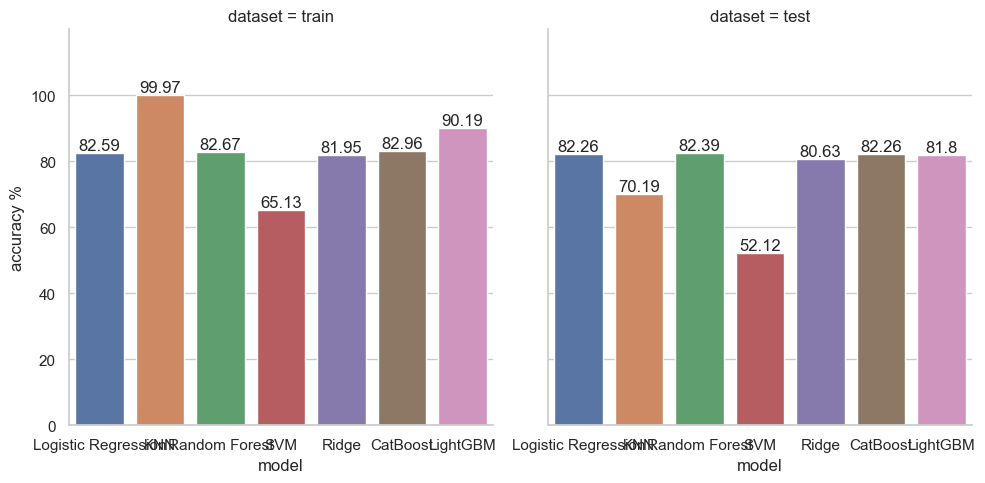

In [169]:
data = df_metrics_clf.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='accuracy %')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
**After comparing with Regression models, its clear that we would get better results from Classification!**

<a id="monetary"></a>
## </span><span style='color:#ff6200'> Conclusion</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:130%; text-align:left">

* In conclusion, the dataset from Google Play Store apps has been explored and analyzed using various data visualization techniques with the help of Matplotlib, Seaborn and Plotly libraries.

* The preliminary analysis, visualization methods and EDA provided insights into the data and helped in understanding the underlying patterns and relationships among the variables.

* The analysis of the Google Play Store dataset has shown that there is a weak correlation between the rating and other app attributes such as size, installs, reviews, and price. We found that there was a moderate positive correlation between the number of installs and the rating, suggesting that higher-rated apps tend to have more installs.

* We also observed that free apps have higher ratings than paid apps, and that app size does not seem to have a significant impact on rating.